# Исследование объявлений о продаже квартир

## Содержание: <a name="content"></a>
- [Импорт библиотек, загрузка и просмотр данных](#loading)
- [Предодработка данных](#preprocessing)
- [Добавление необходимых столбцов в таблицу](#addition)   
- [Исследовательский анализ](#eda)
- [Выводы](#results)

### Импорт библиотек, загрузка и просмотр данных  <a name="loading"></a>

[к содержанию](#content)

In [1]:
# Импортируем нужные библиотеки и открываем файл
import pandas as pd 
#функция, которая позволит масштабировать графики и видеть координаты xy при наведении курсором на значение
%matplotlib notebook 
import matplotlib.pyplot as plt
#дополнительные средства визуализации
import seaborn as sns 

from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# для отображения всех столбцов таблицы
pd.options.display.max_columns = None
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# Смотрим общую информацию по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
# Проверяем наличие дублей
df.duplicated().sum()

0

In [4]:
# Проверяем наличие пропусков в столбцах
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

В полученной таблице 22 столбца и 23699 строк. Первой проблемой при чтении файла стало то, что данные склеились в одну строку - исправили, использую параметр sep. В талице много пропусков и есть неподходящие типы данных: 
- Есть столбцы с вещественным типом данных там, где можно использовать целочисленный тип
- в столбце `is_apartment` должен быть булев тип, но мешают пропуски
- столбец `first_day_exposition` нужно перевести из object в datetime для дальнейшей работы

### Предобработка данных  <a name="preprocessing"></a>

[к содержанию](#content)

В таблице много пропусков. Разберем, что делать с пропусками в каждом столбце:
- Пропуски в `ceiling_height` можно заменить на медиану в зависимости от этажности дома.
- Пропуски в `floors_total` и `locality_name` можно удалить, так как таких строк мало и они существенно не повлияют на исследование.
- Пропуски в `living_area` можно заполнить, сгрупировав данные по количеству комнат и найдя отношения жилой к общей площади у каждой группы.
- Пропуски в `kitchen_area` медианой.
- Пропуски в `is_apartment` и `balcony` можно заменить на "False" и "0". Если человек не указал количество балконов, скорее всего их нет. Аналогично и с апартаментами. 
- Пропуски в `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `ponds_nearest`, `days_exposition` оставим как есть. Необходимо отдельно исследовать причину возникнования пропусков в данных столбцах.

In [5]:
# Посмотрим информацию по столбцу 'ceiling_height'
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<IPython.core.display.Javascript object>


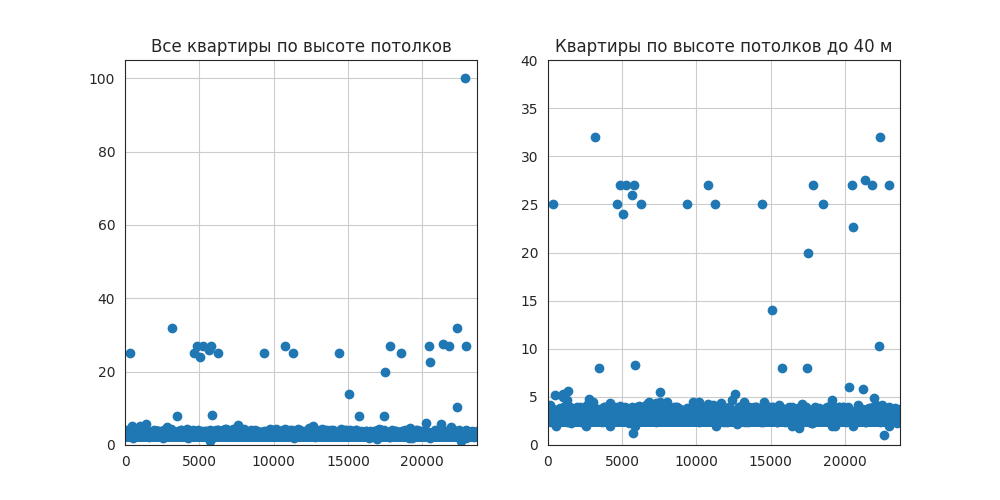

Text(0.5, 1.0, 'Квартиры по высоте потолков до 40 м')

In [6]:
# Видно, что есть выбросы: высота потолков 1,2 м или 100 м - неправдоподобна
# Посмотрим внимательно на распределение
fig = plt.figure(figsize=(10,5))
area = fig.add_subplot(1, 2, 1)
ax = df['ceiling_height'].plot(style='o', ylim=(0, 105), grid=True)
ax.set_title("Все квартиры по высоте потолков")

area = fig.add_subplot(1, 2, 2)
ax = df['ceiling_height'].plot(style='o', ylim=(0, 40), grid=True)
ax.set_title("Квартиры по высоте потолков до 40 м")

<IPython.core.display.Javascript object>


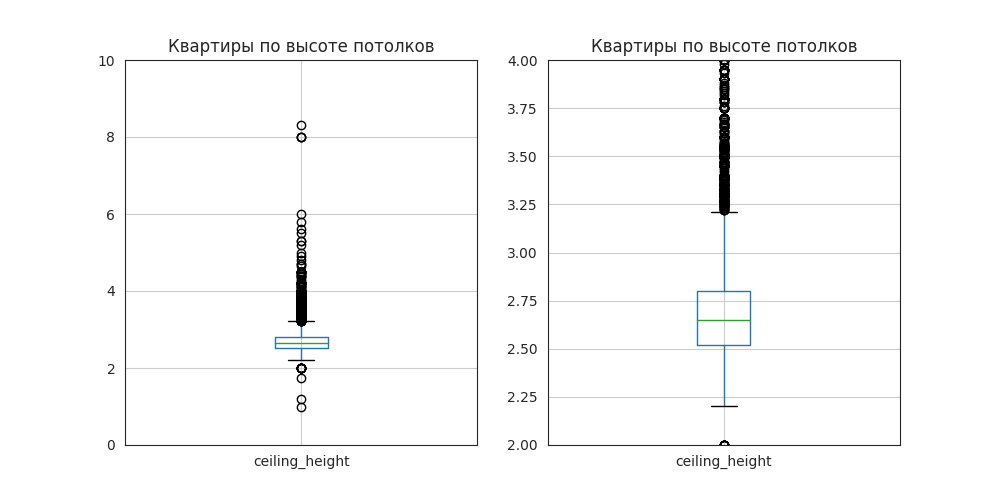

Text(0.5, 1.0, 'Квартиры по высоте потолков')

In [7]:
fig = plt.figure(figsize=(10,5))
area = fig.add_subplot(1, 2, 1)
ax = df.boxplot('ceiling_height')
plt.ylim(0, 10)
ax.set_title("Квартиры по высоте потолков")

area = fig.add_subplot(1, 2, 2)
ax = df.boxplot('ceiling_height')
plt.ylim(2, 4)
ax.set_title("Квартиры по высоте потолков")

Основная часть данных расположена в промежутке от 2 до 5. Что вполне логично, так как, согласно СНиПе 31-01-2003, минимальная высота потолков для Санкт-Петербурга в жилых помещениях 2,5 м и 2,1 в нежилых (например, в коридорах). Максимальная высота не регламентируется. Однако, высота потолков в стандартных домах обычно не превышает 3,2 редко можно встретить потолки с высотою 4 и более метров, так как это требует дополнительных затрат (таких как отопление, отделочные материалы).
В столбце "ceiling_height" от 24 до 32. Скорее всего эти данные ошибочны - неверно выделена целая часть (значения 2,4 - 3,2 вполне могут быть высотой потолков) 

In [8]:
df.query('ceiling_height > 20 and ceiling_height < 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [9]:
# В столбце "ceiling_height" меняем значения 24-32 на 2,4-3,2.
for i in range(len(df['ceiling_height'])):
    if 20 < df['ceiling_height'][i] < 100:
        df['ceiling_height'][i] = df['ceiling_height'][i]/10

In [10]:
# Используя цикл, заменим пропуски медианой в зависимости от этажности дома
types_floors = df['floors_total'].unique()

In [11]:
for i in types_floors:
    df_median = df.loc[df['floors_total'] == i,  'ceiling_height'].median()
    df.loc[df['floors_total'] == i,  'ceiling_height'] = df.loc[df['floors_total'] == i,  'ceiling_height'].fillna(df_median)

<IPython.core.display.Javascript object>


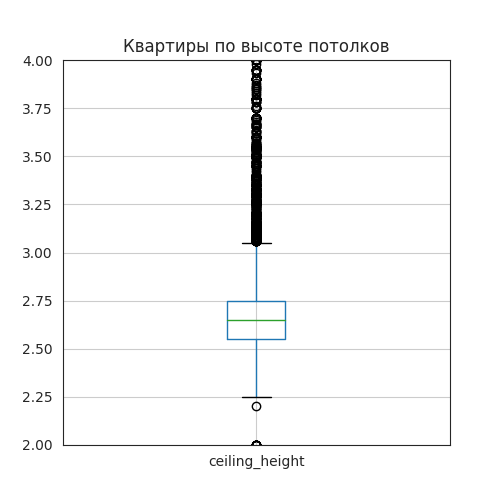

Text(0.5, 1.0, 'Квартиры по высоте потолков')

In [12]:
# Посмотрим, как изменилось распределение на графике
fig = plt.figure(figsize=(5,5))

ax = df.boxplot('ceiling_height')
plt.ylim(2, 4)
ax.set_title("Квартиры по высоте потолков")

После замены границы усов немного сместились: нижний "ус" сместился с 2,2 до 2,25, а верхний с 3,2 до 3,05. Новое распределение вписывается в прогнозируемые рамки

In [13]:
# Проверяем, остались ли пропуски
df[df['ceiling_height'].isnull()].sort_values('floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.00,2016-04-28T00:00:00,3,NaN,33.0,53.00,32,False,False,False,21.00,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21273,3,6300000.0,70.02,2015-03-28T00:00:00,2,NaN,NaN,34.87,19,NaN,False,False,10.13,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,516.0
21753,7,6800000.0,57.00,2017-05-01T00:00:00,2,NaN,NaN,NaN,21,NaN,False,False,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
22656,4,4574160.0,64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0


In [14]:
# Пропуски остались для квартиры в доме с 33 этажами, так как такой дом один во всей таблице
# и в тех строках, где нет данных об общем количестве этажей дома.
# Заменим пропуски общей медианой (далее строки с пропусками в стоблце "ceiling_height" будут удалены)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Заполним пропуски в столбцах "living_area" и "kitchen_area". Для этого сгруппируем данные по количеству комнат и посмотрим для каждой группы сколько приходится на жилую часть и кухню от общей площади. Таким образом, у нас будет коэффициент, с помощью которого можно найти недостающие значения.

In [15]:
# Соберем список типов квартир по количесву комнат
number_of_rooms = df['rooms'].unique()
number_of_rooms

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [16]:
# Найдем отношение жилой площади к общей и отношение площади кухни к общей
df['ratio_living_area_total_area'] = df['living_area']/df['total_area']
df['ratio_kitchen_area_total_area'] = df['kitchen_area']/df['total_area']

In [17]:
# Заполним недостающие данные в столбцах 'ratio_living_area_total_area' и 'ratio_kitchen_area_total_area', используя медиану
for i in number_of_rooms:
    df_median_ratio_living_total = df.loc[df['rooms'] == i, 'ratio_living_area_total_area'].median()
    df.loc[df['rooms'] == i, 'ratio_living_area_total_area'] = df.loc[df['rooms'] == i, 'ratio_living_area_total_area'].fillna(df_median_ratio_living_total)

In [18]:
df['ratio_kitchen_area_total_area'] = df['ratio_kitchen_area_total_area'].fillna(df['ratio_kitchen_area_total_area'].median())

In [19]:
# Заменим пропуски на "0"
df['living_area'] = df['living_area'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [20]:
for i in range(len(df['living_area'])):
    if df['living_area'][i] == 0:
        df['living_area'][i] = df['total_area'][i]*df['ratio_living_area_total_area'][i]

In [21]:
for i in range(len(df['kitchen_area'])):
    if df['kitchen_area'][i] == 0:
        df['kitchen_area'][i] = df['total_area'][i]*df['ratio_kitchen_area_total_area'][i]

In [22]:
# Удалим пропуски в "floors_total" и "locality_name"
df.dropna(subset=['floors_total'], inplace=True)

In [23]:
df.dropna(subset=['locality_name'], inplace=True)

In [24]:
# Заменим пропуски в столбце "balcony" на нули
df['balcony'] = df['balcony'].fillna(0)

In [25]:
# Заменим пропуски в столбце "is_apartment" на "False"
df['is_apartment'] = df['is_apartment'].fillna(False)

In [26]:
# Проверим пропуски
df.isnull().sum()

total_images                         0
last_price                           0
total_area                           0
first_day_exposition                 0
rooms                                0
ceiling_height                       0
floors_total                         0
living_area                          0
floor                                0
is_apartment                         0
studio                               0
open_plan                            0
kitchen_area                         0
balcony                              0
locality_name                        0
airports_nearest                  5524
cityCenters_nearest               5501
parks_around3000                  5500
parks_nearest                    15535
ponds_around3000                  5500
ponds_nearest                    14529
days_exposition                   3171
ratio_living_area_total_area         0
ratio_kitchen_area_total_area        0
dtype: int64

In [27]:
# Меняем вещественный тип данных на целочисленный методом astype
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

In [28]:
# В столбцах с отношением площадей оставим два знака после запятой
df['ratio_living_area_total_area'] = df['ratio_living_area_total_area'].round(2)
df['ratio_kitchen_area_total_area'] = df['ratio_kitchen_area_total_area'].round(2)

In [29]:
# Меняем тип данных из столбца "first_day_exposition" с object на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images                     23565 non-null int64
last_price                       23565 non-null float64
total_area                       23565 non-null float64
first_day_exposition             23565 non-null datetime64[ns]
rooms                            23565 non-null int64
ceiling_height                   23565 non-null float64
floors_total                     23565 non-null int64
living_area                      23565 non-null float64
floor                            23565 non-null int64
is_apartment                     23565 non-null bool
studio                           23565 non-null bool
open_plan                        23565 non-null bool
kitchen_area                     23565 non-null float64
balcony                          23565 non-null int64
locality_name                    23565 non-null object
airports_nearest                 18041 non-null float64
cityCent

Пропуски были обработаны использованием логической замены и использованием медианных значений, так же часть пропусков осталась нетронутой. 
По каждой квартире были доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.
Пропуски в первом виде данных могли появиться из-за человеческого фактора (например, человек не знает жилую площадь квартиры; не указал количество балконов, так как в квартире их нет; не правильно указал высоту потолков). 
Пропуски в данных, которые должны были быть расчитаны автоматически, возможно, являются следствием ошибки при записи данных. Нужно проверить отдельно, почему возникают подобные пропуски.

Также изменены типы данных: 
    - заменили вещественный тип данных на целочисленный
    - заменили тип object на datetime для столбца `first_day_exposition`

### Добавление необходимых столбцов в таблицу  <a name="addition"></a>

[к содержанию](#content)

In [30]:
# Расчитаем цену квадратного метра и округлим до 2 знаков после запятой
df['price_per_square_meter'] = df['last_price']/df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area_total_area,ratio_kitchen_area_total_area,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.47,0.23,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.46,0.27,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.61,0.15,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,100.435,9,False,False,False,27.413793,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.63,0.17,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.32,0.41,100000.00


In [31]:
# Укажем в отдельных столбцах день недели, месяц и год публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area_total_area,ratio_kitchen_area_total_area,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.47,0.23,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.46,0.27,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.61,0.15,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,100.435,9,False,False,False,27.413793,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.63,0.17,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.32,0.41,100000.00,1,6,2018


In [32]:
# Добавляем столбец для этажей квартиры, где будут указаны гпуппы — первый, последний, другой
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == 1 and floors_total == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1)

In [33]:
# Проверка
df.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area_total_area,ratio_kitchen_area_total_area,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.47,0.23,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.46,0.27,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.61,0.15,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,100.435000,9,False,False,False,27.413793,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.63,0.17,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.32,0.41,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.100000,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.47,0.30,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.600000,6,False,False,False,14.400000,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.28,0.39,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,41.886654,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.59,0.26,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.430000,26,False,False,False,8.810000,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.47,0.27,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.71,0.11,88524.59,6,2,2017,другой


В таблицу добавили данные, которые помогут в дальнейшем исследовании:
- цену за квадратный метр,
- день недели, месяц и год публикации объявления,
- группу этажа: первый, последний, другой.

Так же ранее были добавлены столбцы с соотношением жилой и общей площади, а также отношением площади кухни к общей.

### Шаг 4. Исследовательский анализ данных  <a name="eda"></a>

[к содержанию](#content)

Построим распределение квартир по площади, цене, числу комнат и высоте потолков.

In [34]:
# Посмотрим на описание данных в столбцах
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.714021
std,35.657060,1.091093e+07,1.078591,0.694698
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


In [35]:
# Значения в столбце "last_price" достаточно большие, 
# чтобы легче ориентироваться по графику добавим столбец с ценой в миллионах
# и будем строить графики по нему
df['last_price_million'] = df['last_price'] / 1000000

<IPython.core.display.Javascript object>


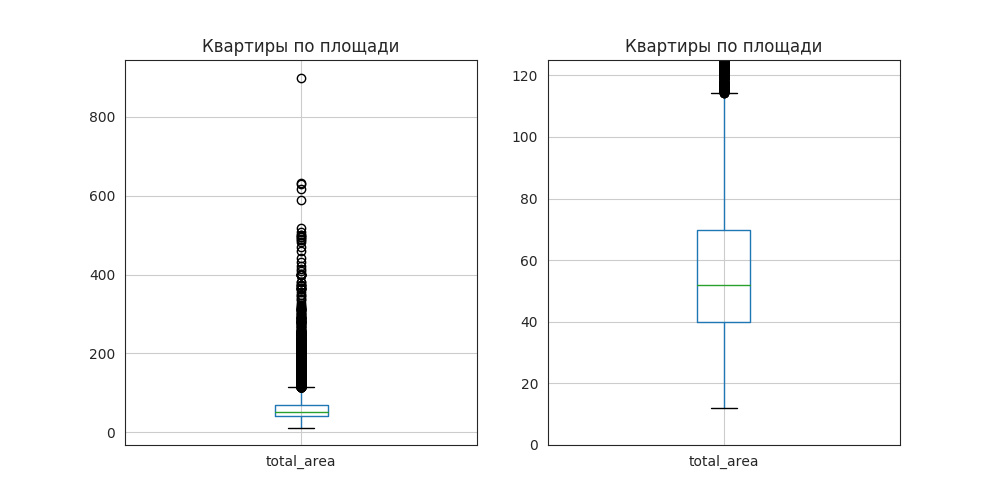

In [36]:
# Построим диаграмму размаха и гистограмму для каждого параметра
fig = plt.figure(figsize=(10,5))
area = fig.add_subplot(1, 2, 1)
ax = df.boxplot('total_area')
ax.set_title("Квартиры по площади")

area = fig.add_subplot(1, 2, 2)
ax = df.boxplot('total_area')
plt.ylim(0, 125)
ax.set_title("Квартиры по площади")


plt.show()

<IPython.core.display.Javascript object>


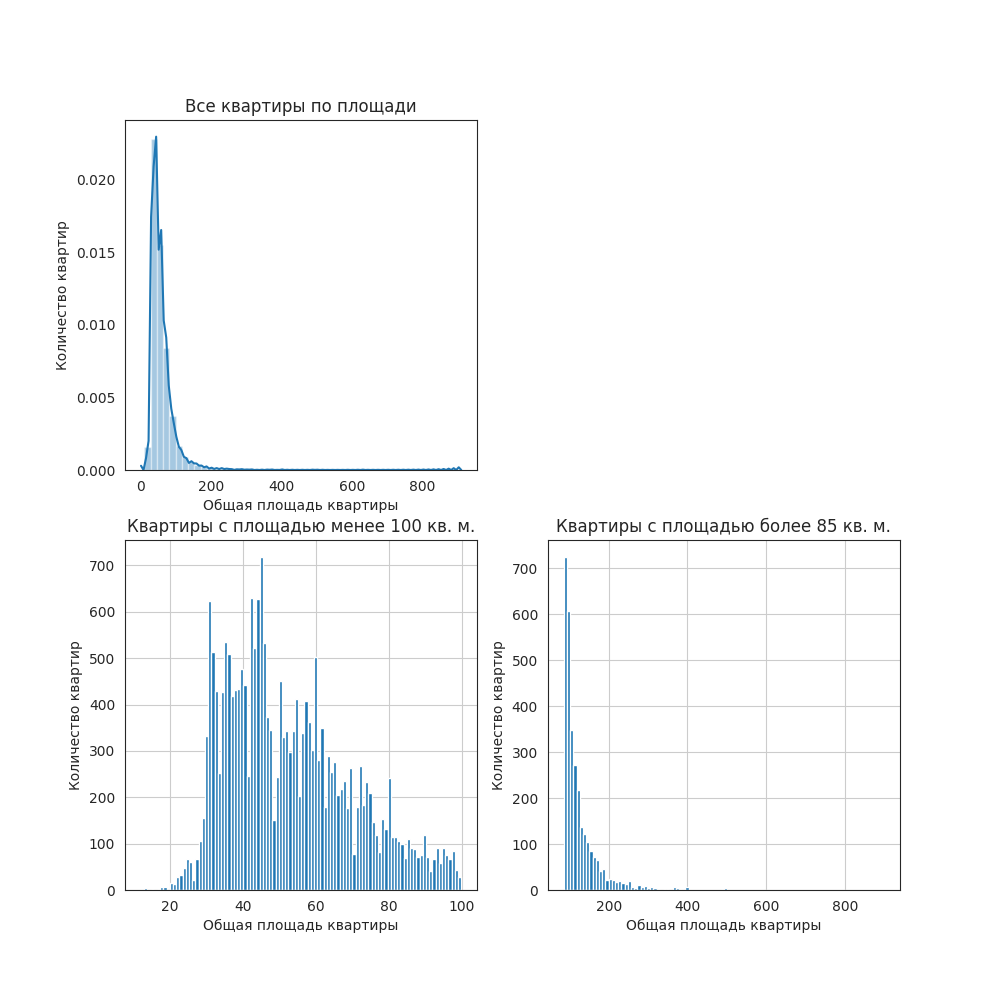

Text(0, 0.5, 'Количество квартир')

In [37]:
fig = plt.figure(figsize=(10,10))
area = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df['total_area'])
ax.set_title("Все квартиры по площади")
ax.set_xlabel("Общая площадь квартиры")
ax.set_ylabel("Количество квартир")

little_area = df.query('total_area < 100')
area = fig.add_subplot(2, 2, 3)
ax = little_area['total_area'].hist(bins=100)
ax.set_title("Квартиры с площадью менее 100 кв. м.")
ax.set_xlabel("Общая площадь квартиры")
ax.set_ylabel("Количество квартир")

large_area=df.query('total_area > 85')
area = fig.add_subplot(2, 2, 4)
ax=large_area['total_area'].hist(bins=100)
ax.set_title("Квартиры с площадью более 85 кв. м.")
ax.set_xlabel("Общая площадь квартиры")
ax.set_ylabel("Количество квартир")


In [38]:
#Оценив диаграмму распределения и гистограмму, уберем редкие и выбирающиеся значения (меньше 20 и больше 300)
norm_area = df.query('total_area > 20 and total_area < 300')

<IPython.core.display.Javascript object>


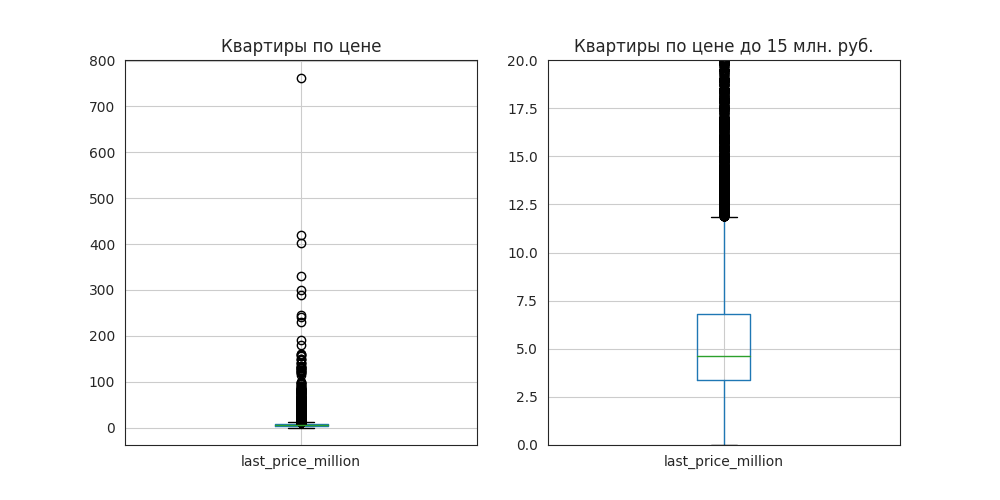

In [39]:
fig = plt.figure(figsize=(10,5))
area = fig.add_subplot(1, 2, 1)
ax = df.boxplot('last_price_million')
ax.set_title("Квартиры по цене")

area = fig.add_subplot(1, 2, 2)
ax = df.boxplot('last_price_million')
plt.ylim(0, 20)
ax.set_title("Квартиры по цене до 15 млн. руб.")

plt.show()

<IPython.core.display.Javascript object>


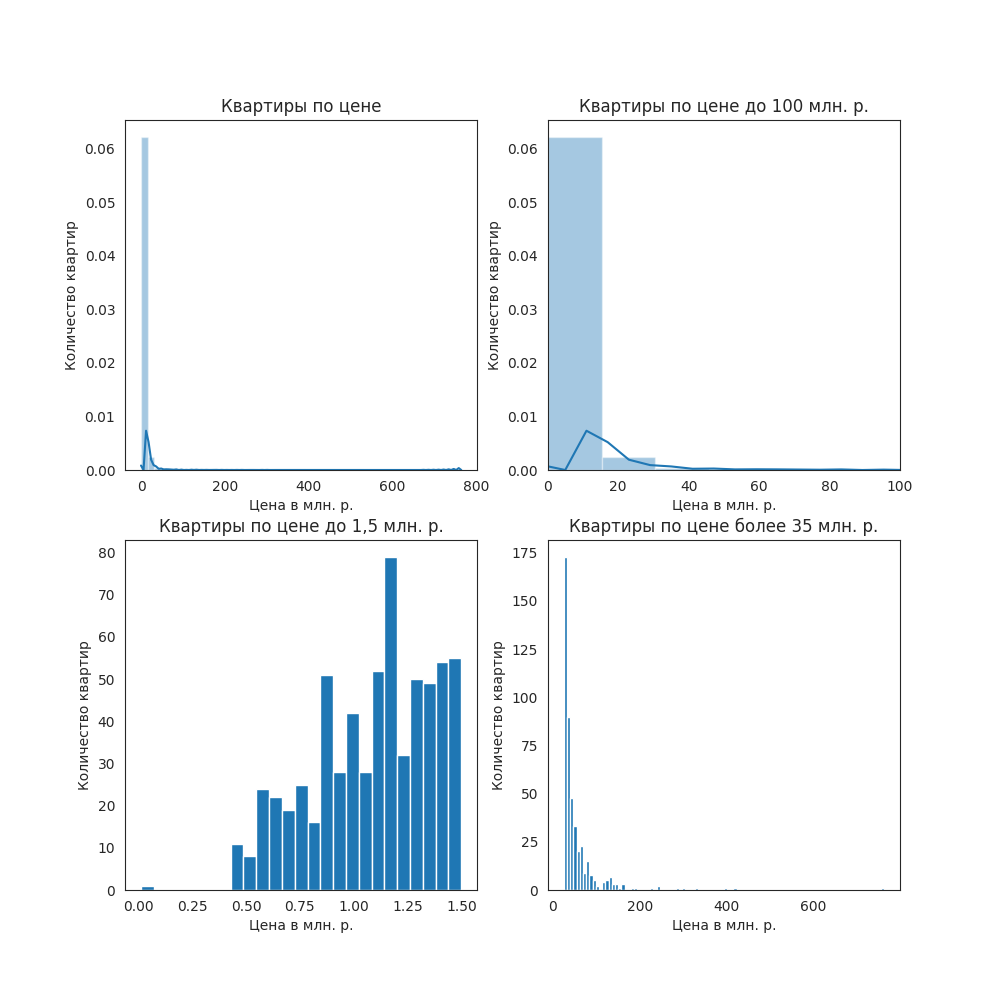

Text(0, 0.5, 'Количество квартир')

In [40]:
fig = plt.figure(figsize=(10,10))
area = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df['last_price_million'])
ax.set_title("Квартиры по цене")
ax.set_xlabel("Цена в млн. р.")
ax.set_ylabel("Количество квартир")

area = fig.add_subplot(2, 2, 2)
ax = sns.distplot(df['last_price_million'])
plt.xlim(0, 100)
ax.set_title("Квартиры по цене до 100 млн. р.")
ax.set_xlabel("Цена в млн. р.")
ax.set_ylabel("Количество квартир")

low_price = df.query('last_price_million < 1.5')
area = fig.add_subplot(2, 2, 3)
ax = low_price['last_price_million'].plot.hist(bins=25)
ax.set_title("Квартиры по цене до 1,5 млн. р.")
ax.set_xlabel("Цена в млн. р.")
ax.set_ylabel("Количество квартир")

high_price = df.query('last_price_million > 25')
area = fig.add_subplot(2, 2, 4)
ax = high_price['last_price_million'].plot.hist(bins=100)
ax.set_title("Квартиры по цене более 35 млн. р.")
ax.set_xlabel("Цена в млн. р.")
ax.set_ylabel("Количество квартир")

In [41]:
#Уберем редкие и выбирающиеся значения (меньше 0.4 и больше 30)
norm_last_price = norm_area.query('last_price_million > 0.4 and last_price_million < 30')

<IPython.core.display.Javascript object>


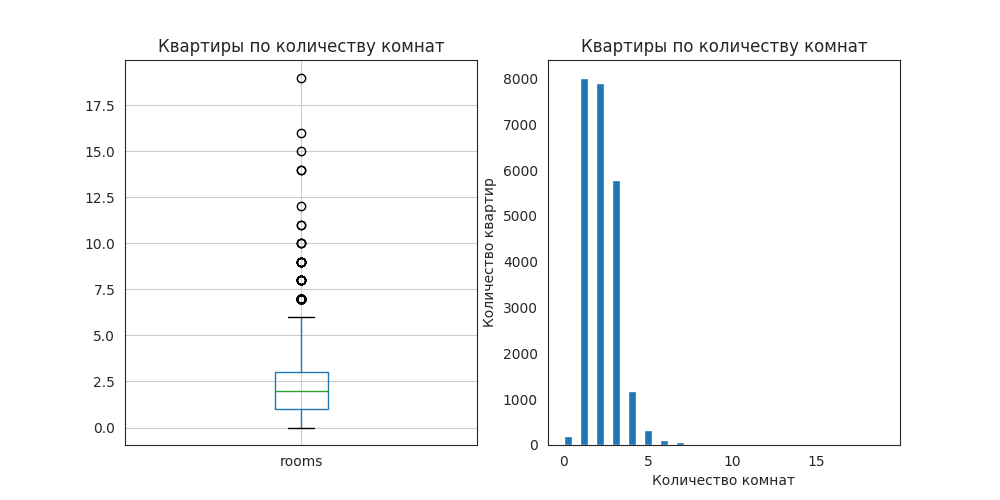

Text(0, 0.5, 'Количество квартир')

In [42]:
fig = plt.figure(figsize=(10,5))

area = fig.add_subplot(1, 2, 1)
ax = df.boxplot('rooms')
ax.set_title("Квартиры по количеству комнат")

area = fig.add_subplot(1, 2, 2)
ax = df['rooms'].plot.hist(bins=40)
ax.set_title("Квартиры по количеству комнат")
ax.set_xlabel("Количество комнат")
ax.set_ylabel("Количество квартир")



In [43]:
#Уберем редкие и выбирающиеся значения (больше 6)
norm_rooms = norm_last_price.query('rooms < 6')

<IPython.core.display.Javascript object>


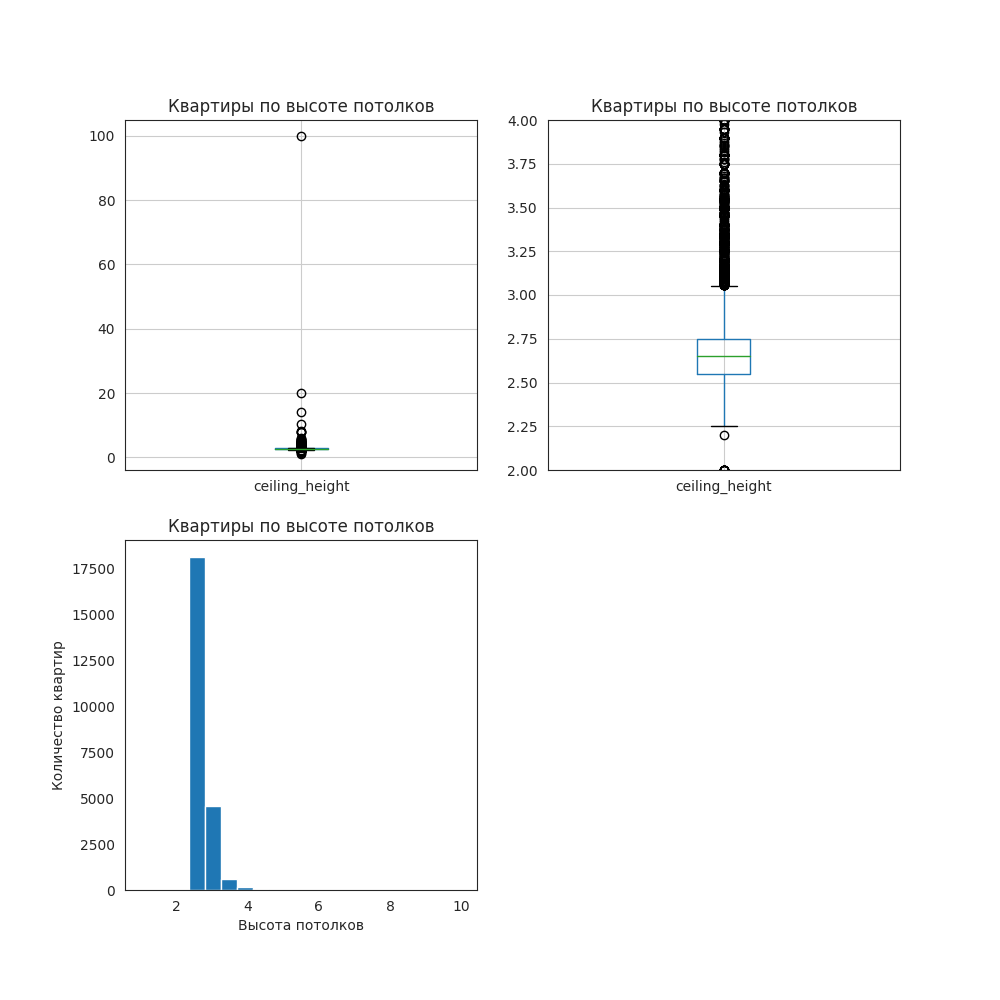

In [44]:
fig = plt.figure(figsize=(10,10))

area = fig.add_subplot(2, 2, 1)
ax = df.boxplot('ceiling_height') 
ax.set_title("Квартиры по высоте потолков")

area = fig.add_subplot(2, 2, 2)
ax = df.boxplot('ceiling_height') 
plt.ylim(2, 4)
ax.set_title("Квартиры по высоте потолков")

area = fig.add_subplot(2, 2, 3)
ax = df['ceiling_height'].plot.hist(bins=20, range = (1, 10))
ax.set_title("Квартиры по высоте потолков")
ax.set_xlabel("Высота потолков")
ax.set_ylabel("Количество квартир")

plt.show()

In [45]:
#Уберем редкие и выбирающиеся значения (меньше 2,25 и больше 4)
norm_ceiling_height = norm_rooms.query('ceiling_height > 2.25 and ceiling_height < 4')

В таблице было много выбросов и редких значений, особенно их при рассмотрении площадей и цен.
Исходя из границ "усов" диаграммы размаха, а также распределению значений на гистограмме, были исключены следующие значения:
- для площади это значения меньше 20 и больше 300
- для цены - меньше 0,4 млн. и больше 300 млн.
- для количества комнат - значения больше 6
- для высоты потолка - меньше 2,25 и больше 4

Теперь изучим время продажи квартиры. Посчитаем среднее и медиану, построим гистограмму. 

In [46]:
# Посмотрим информацию по столбцу "days_exposition"
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи составило 181 день, медиана - 95. Посмотрим распределение на графике

<IPython.core.display.Javascript object>


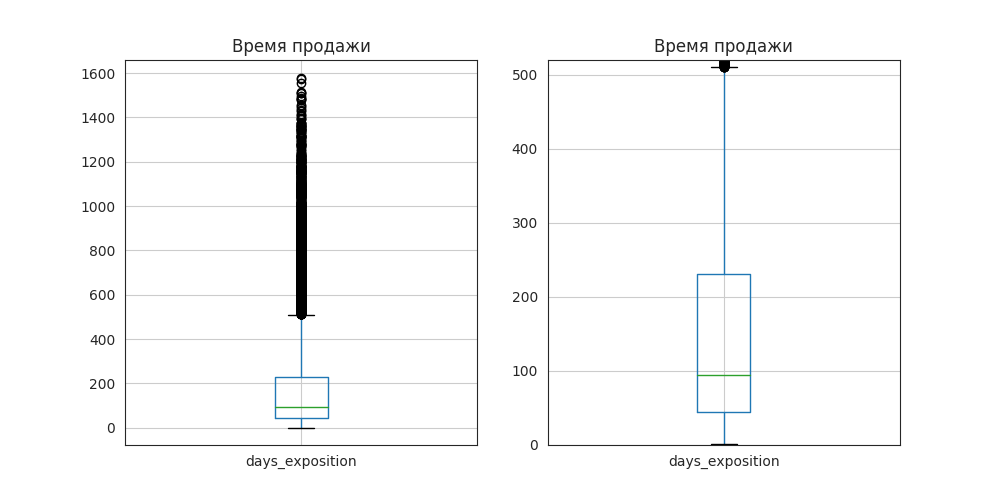

Text(0.5, 1.0, 'Время продажи')

In [47]:
fig = plt.figure(figsize=(10,5))

area = fig.add_subplot(1, 2, 1)
ax = df.boxplot('days_exposition')
ax.set_title("Время продажи")

area = fig.add_subplot(1, 2, 2)
ax = df.boxplot('days_exposition')
plt.ylim(0, 520)
ax.set_title("Время продажи")

<IPython.core.display.Javascript object>


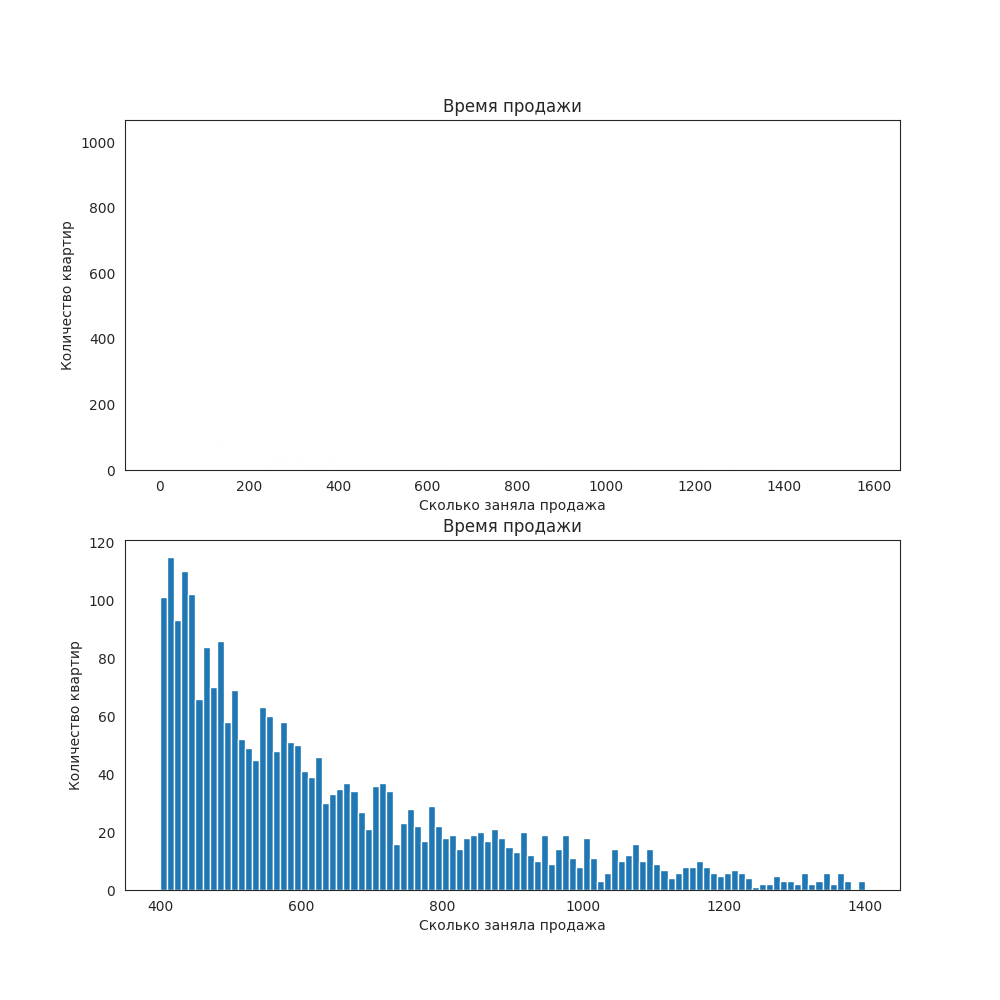

Text(0, 0.5, 'Количество квартир')

In [48]:
fig = plt.figure(figsize=(10,10))

area = fig.add_subplot(2, 1, 1)
ax = df['days_exposition'].plot.hist(bins=1000)
ax.set_title("Время продажи")
ax.set_xlabel("Сколько заняла продажа")
ax.set_ylabel("Количество квартир")

area = fig.add_subplot(2, 1, 2)
ax = df['days_exposition'].plot.hist(bins=100, range=(400,1400))
ax.set_title("Время продажи")
ax.set_xlabel("Сколько заняла продажа")
ax.set_ylabel("Количество квартир")

<IPython.core.display.Javascript object>


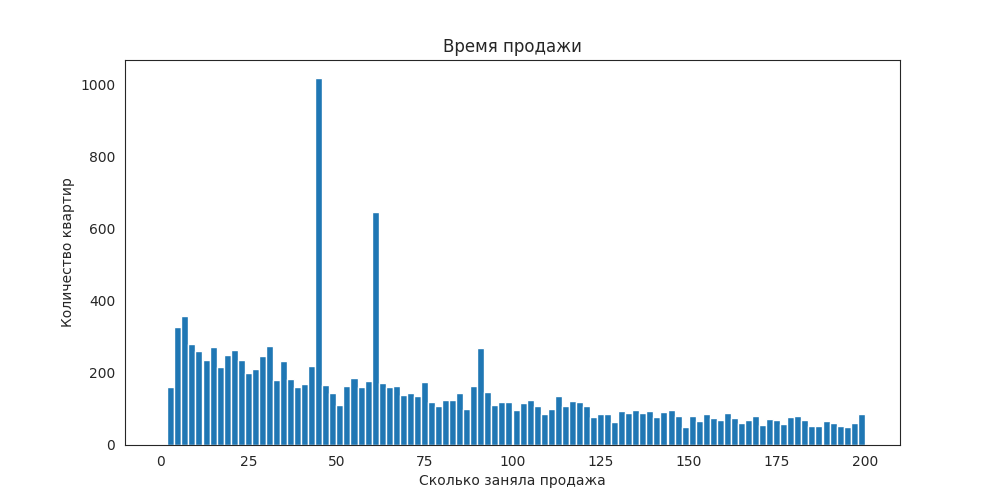

Text(0, 0.5, 'Количество квартир')

In [49]:
fig = plt.figure(figsize=(10,5))

ax = df['days_exposition'].plot.hist(bins=100, range=(0,200))
ax.set_title("Время продажи")
ax.set_xlabel("Сколько заняла продажа")
ax.set_ylabel("Количество квартир")

In [50]:
#Уберем редкие и выбирающиеся значения (меньше 3 и больше 800)
good_df = norm_ceiling_height.query('days_exposition > 3 and days_exposition < 800')

Чаще всего продажа занимает от 45 до 231 дня. "Усы" находятся в промежутке от 0 до 510, а после 800 количество продаж совсем маленькое: квартира продается необычайно долго, если с момента публикации прошло более 800 дней.

На графике от 0 до 200 видны всплекски на 45, 60 и 90 дни, что соответствует срокам автоматического удаления объявлений (по правилам сервиса, если размещение не продлили вручную)


Посмотрим, от каких параметров зависит цена. Используем матрицу корреляций и раскрасим ее, чтобы результаты были нагляднее.

In [51]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area_total_area,ratio_kitchen_area_total_area,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,last_price_million
total_images,1,0.105026,0.116969,0.0997594,0.0110662,0.00982199,0.1014,0.0327806,0.0104023,-0.0282013,-0.0246702,0.110158,0.0468793,-0.00270139,-0.0481035,0.0209548,-0.00601671,-0.0113516,-0.00399529,-0.0273396,0.0039373,-0.017169,0.133189,-0.00932544,0.00448563,0.139238,0.105026
last_price,0.105026,1,0.653621,0.363191,0.10536,-0.0067447,0.586084,0.0268418,0.0269813,-0.025084,-0.00880053,0.513867,0.0085685,-0.0262161,-0.206353,0.151492,-0.0165286,0.160735,-0.0858362,0.0808579,0.0168702,-0.0754132,0.736799,0.00135692,0.00272596,-0.0428642,1
total_area,0.116969,0.653621,1,0.758735,0.130735,-0.0752519,0.946904,-0.0243682,0.0297482,-0.0720005,-0.0349424,0.659683,0.0102434,-0.0304661,-0.231181,0.16589,-0.0212663,0.163757,-0.10014,0.149974,0.164434,-0.293658,0.302571,-0.00567986,0.00496098,-0.0790407,0.653621
rooms,0.0997594,0.363191,0.758735,1,0.0725615,-0.227913,0.826019,-0.151341,0.000399498,-0.146068,-0.0877353,0.32559,-0.0155419,-0.0609751,-0.184096,0.137806,-0.0537186,0.0935999,-0.0601191,0.126969,0.498609,-0.547234,0.0556799,-0.00520708,-0.00391561,-0.0544916,0.363191
ceiling_height,0.0110662,0.10536,0.130735,0.0725615,1,-0.0165026,0.121168,-0.00391559,0.150624,0.00524927,0.00153799,0.119973,0.0148013,-0.0237502,-0.100811,0.0764845,-0.0220389,0.0810518,-0.0495115,0.030513,-0.0103804,0.026691,0.162315,-0.00673138,-0.000420307,-0.0142137,0.10536
floors_total,0.00982199,-0.0067447,-0.0752519,-0.227913,-0.0165026,1,-0.158549,0.67801,-0.026402,0.0702235,0.0508443,0.122503,0.173408,0.108547,0.0187428,-0.25249,0.0976076,-0.122799,0.0400028,-0.0524099,-0.354718,0.326411,0.148423,0.0125425,0.0169088,0.00788296,-0.0067447
living_area,0.1014,0.586084,0.946904,0.826019,0.121168,-0.158549,1,-0.0885289,0.0288755,-0.0544245,-0.0222362,0.507922,-0.011126,-0.0514158,-0.227444,0.178318,-0.0493539,0.149234,-0.0870206,0.14281,0.420127,-0.437034,0.231324,-0.0044774,-0.000431271,-0.0700656,0.586084
floor,0.0327806,0.0268418,-0.0243682,-0.151341,-0.00391559,0.67801,-0.0885289,1,-0.0132345,0.0359464,0.0361837,0.108144,0.171507,0.0731295,0.00833603,-0.163601,0.0729881,-0.0762395,0.0264668,-0.0390424,-0.255812,0.229356,0.129203,0.0110166,0.0207359,0.00540424,0.0268418
is_apartment,0.0104023,0.0269813,0.0297482,0.000399498,0.150624,-0.026402,0.0288755,-0.0132345,1,-0.00364087,-0.00246226,0.0448112,0.0329443,0.0165081,0.00373368,0.0208231,-0.033553,0.0240973,0.00330326,0.0153367,0.00310371,0.0179367,0.0447936,-0.00947298,0.00235558,0.00928947,0.0269813
studio,-0.0282013,-0.025084,-0.0720005,-0.146068,0.00524927,0.0702235,-0.0544245,0.0359464,-0.00364087,1,-0.00421613,-0.0745585,0.0300189,-0.0217071,-0.00686397,-0.0308574,0.00692282,0.000812686,0.00183818,-0.0215722,0.0898619,-0.0177476,0.0155287,-0.000857536,-0.000716747,0.01086,-0.025084


In [52]:
# Выведем только корреляцию по стоимости и отсортируем
corr_last_price = corr['last_price']
corr_last_price.sort_values()

cityCenters_nearest             -0.206353
ponds_nearest                   -0.085836
ratio_kitchen_area_total_area   -0.075413
year_exposition                 -0.042864
airports_nearest                -0.026216
studio                          -0.025084
parks_nearest                   -0.016529
open_plan                       -0.008801
floors_total                    -0.006745
weekday_exposition               0.001357
month_exposition                 0.002726
balcony                          0.008568
ratio_living_area_total_area     0.016870
floor                            0.026842
is_apartment                     0.026981
days_exposition                  0.080858
total_images                     0.105026
ceiling_height                   0.105360
parks_around3000                 0.151492
ponds_around3000                 0.160735
rooms                            0.363191
kitchen_area                     0.513867
living_area                      0.586084
total_area                       0

Опираясь на шкалу Чеддока, можно говорить о том, что заметная связь есть между стоимостью и общей площадью, а также между стоимостью и жилой площадью. Связь между стоимостью и площадью кухни, а также количеством комнат также прослеживатеся, но является не такой сильной (умеренной). Для остальных параметрой коэффициент корреляции менее 0,3 свидетельствует о слабой связи с ценой.

Цена зависит от площади квартиры. Посмотрим внимательнее на корреляцию этих параментов с учетом количества комнат в квартире.

<IPython.core.display.Javascript object>


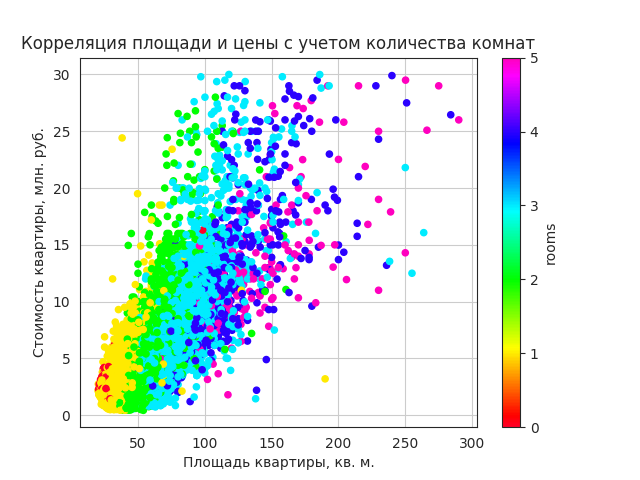

Text(0, 0.5, 'Стоимость квартиры, млн. руб.')

In [53]:
price_area_rooms = good_df.plot(x='total_area', y='last_price_million', kind='scatter', c='rooms', colormap='gist_rainbow', grid=True)
price_area_rooms.set_title("Корреляция площади и цены с учетом количества комнат")
price_area_rooms.set_xlabel("Площадь квартиры, кв. м.")
price_area_rooms.set_ylabel("Стоимость квартиры, млн. руб.")

В целом, чем больше комнат, тем больше площадь. Самые маленькие и дешевые квартиры - однокомнатные. Дальше распределение уже не однозначное: есть трехкомнатные квартиры, которые дороже пятикомнатных при примерно равной площади. Здесь имеет значение так же расположение домов: квартиры в Санкт-Петербурге дороже, чем в маленьком населенном пункте Ленинградской области, и квартиры в центре дороже, чем на окрайне.

<IPython.core.display.Javascript object>


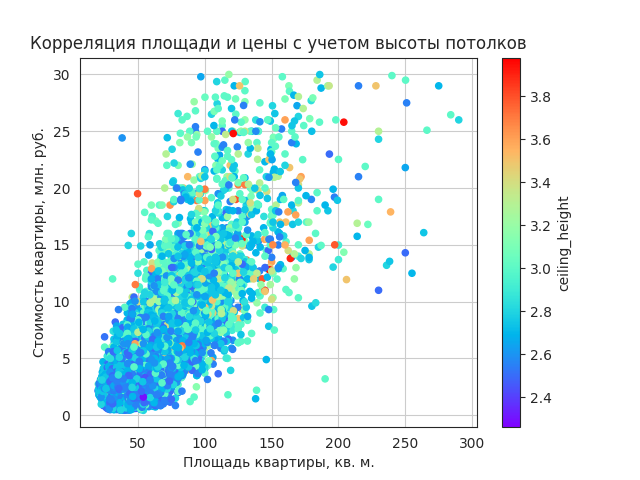

Text(0, 0.5, 'Стоимость квартиры, млн. руб.')

In [54]:
price_area_ceiling = good_df.plot(x='total_area', y='last_price_million', kind='scatter', c='ceiling_height', colormap='rainbow', grid=True)
price_area_ceiling.set_title("Корреляция площади и цены с учетом высоты потолков")
price_area_ceiling.set_xlabel("Площадь квартиры, кв. м.")
price_area_ceiling.set_ylabel("Стоимость квартиры, млн. руб.")

Высота потолков от 2,5 до 3 встречаются как в дорогих, так и в дешевых квартирах.

<IPython.core.display.Javascript object>


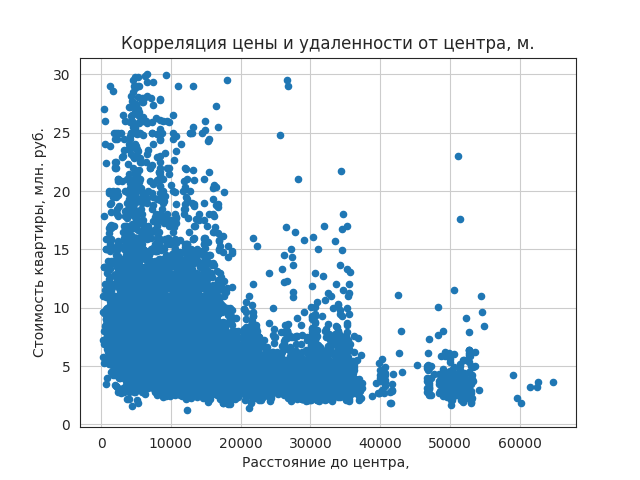

Text(0, 0.5, 'Стоимость квартиры, млн. руб.')

In [55]:
price_cityCenters_nearest = good_df.plot(x='cityCenters_nearest', y='last_price_million', kind='scatter', grid=True)
price_cityCenters_nearest.set_title("Корреляция цены и удаленности от центра, м.")
price_cityCenters_nearest.set_xlabel("Расстояние до центра, ")
price_cityCenters_nearest.set_ylabel("Стоимость квартиры, млн. руб.")

Квартиры в центре более дорогие

In [56]:
floor_pivot_table = (
    good_df
    .pivot_table(index='floor_category', values = 'total_images', aggfunc='count')
)
floor_pivot_table.columns = ['publications']
price_mean_square_meter = good_df.pivot_table(index='floor_category', values='price_per_square_meter', aggfunc='mean')
floor_pivot_table['price_per_square_meter_mean'] = price_mean_square_meter['price_per_square_meter']
floor_pivot_table.sort_values('publications', ascending = False)

,publications,price_per_square_meter_mean
floor_category,,
другой,14417,98885.446553
последний,2636,87534.693319
первый,2340,79258.787897


Некоторые не рассматривают вариант покупки квартиры на первом и последнем этажах, возможно этим объясняется более низкая цена за квадратный метр в таких квартирах.

<IPython.core.display.Javascript object>


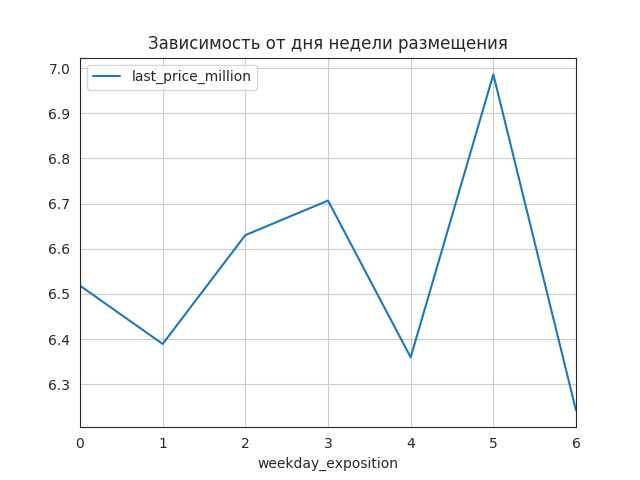

In [57]:
(df
     .pivot_table(index='weekday_exposition', values = 'last_price_million', aggfunc='mean')
     .plot(grid=True, title='Зависимость от дня недели размещения')
)

Дороже всего продавались квартиры, объявления которых были размещены в субботу, дешевле всех те, чьи объявления разместили в воскресение. 

<IPython.core.display.Javascript object>


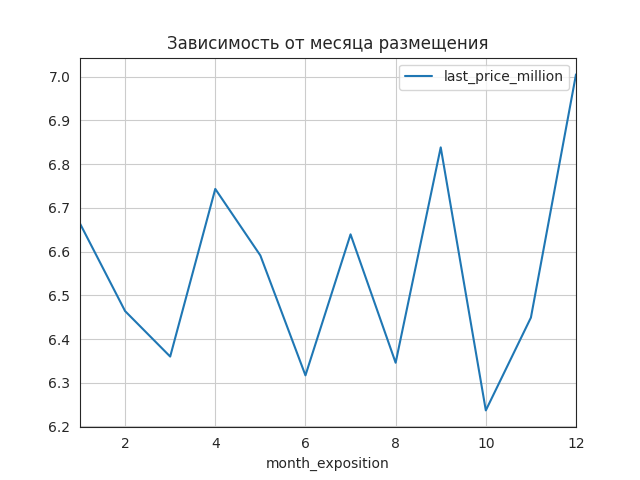

In [58]:
(df
     .pivot_table(index='month_exposition', values = 'last_price_million', aggfunc='mean')
     .plot(grid=True, title='Зависимость от месяца размещения')
)

Судя по графику объявления на самые дорогие квартиры были размещены в декабре (большую роль тут сыграли объявления 2014 года, когда цены на жилье были выше - 116 из 136 квартир были размещены в декабре).

<IPython.core.display.Javascript object>


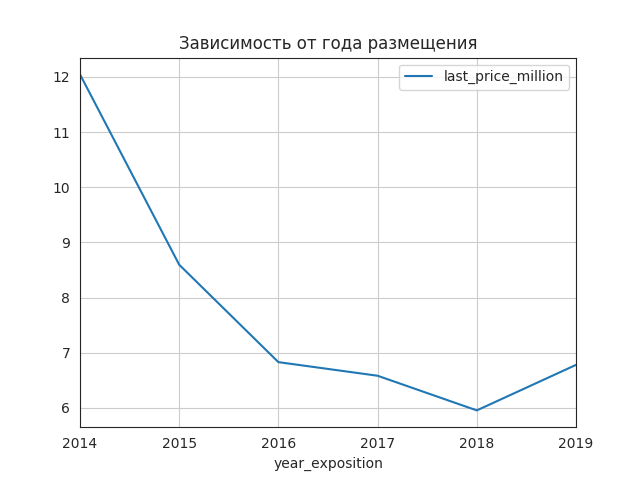

In [59]:
(df
     .pivot_table(index='year_exposition', values = 'last_price_million', aggfunc='mean')
     .plot(grid=True, title='Зависимость от года размещения')
)

На графике видно снижение стоимости жилья после 2014 года. Возможно, что после падения рубля в 2014 году спрос на недвижимость сократился, что привело к снижению цен.

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [60]:
top10 = (
    good_df
    .pivot_table(index='locality_name', values = 'total_images', aggfunc='count')
)
top10.columns = ['publications']
price_mean_square_meter = good_df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
top10['price_per_square_meter_mean'] = price_mean_square_meter['price_per_square_meter']
last_price_mean = good_df.pivot_table(index='locality_name', values='last_price', aggfunc='mean')
top10['last_price_mean'] = last_price_mean['last_price']
top10 = top10.sort_values('publications', ascending = False).head(10)
top10

,publications,price_per_square_meter_mean,last_price_mean
locality_name,,,
Санкт-Петербург,12785,108293.278443,6.427086e+06
посёлок Мурино,501,85889.798862,3.662883e+06
посёлок Шушары,399,77749.868446,4.065583e+06
Всеволожск,327,68525.661988,3.695420e+06
Колпино,303,74692.665941,3.786090e+06
посёлок Парголово,296,89556.307703,4.385113e+06
Пушкин,289,101395.655467,5.854742e+06
деревня Кудрово,289,92529.965156,4.255659e+06
Гатчина,258,68064.703333,3.355365e+06


<IPython.core.display.Javascript object>


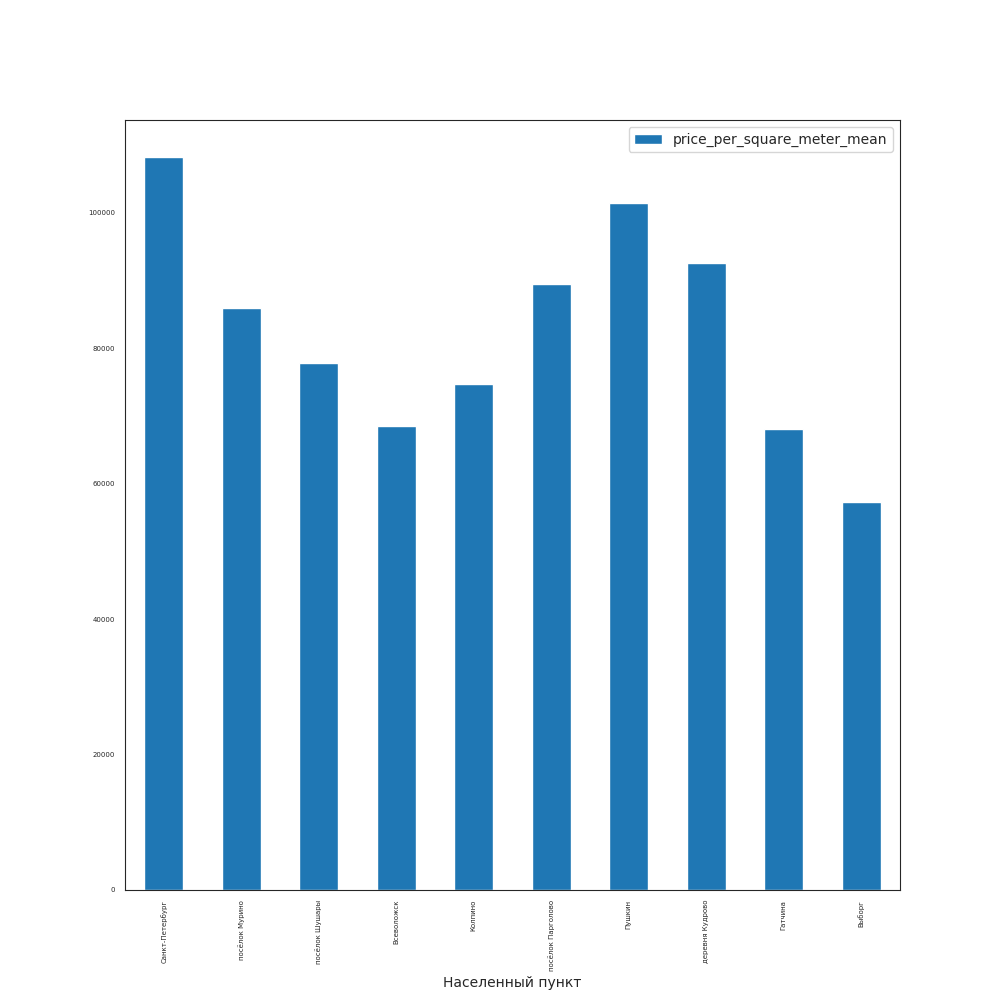

Text(0.5, 0, 'Населенный пункт')

In [61]:
top10.plot(y='price_per_square_meter_mean', kind='bar', figsize=(10,10), fontsize=5)
plt.xlabel('Населенный пункт')

Мы получили 10 населённых пунктов с наибольшим числом объявлений: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.
Самое дорогое жилье в Санкт-Петербурге (средняя стоимость квадратного метра 108 293 руб, а средняя стоимость квартиры - 6 427 086 руб.), а самое дешевое жилье из перечисленных мест в Выборге (средняя стоимость квадратного метра 57 301 руб, а средняя стоимость квартиры - 3 044 635 руб.)

Посмотрим предложения квартир в Санкт-Петербурге и выясним, какая область входит в центр. 

In [62]:
# Выделяем питерские квартиры и создаем столбец с расстоянием до центра в километрах
df_spb = good_df[good_df['locality_name'] == 'Санкт-Петербург']
df_spb['cityCenters_nearest_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['cityCenters_nearest_km'] = df_spb['cityCenters_nearest_km'].round(0)

<IPython.core.display.Javascript object>


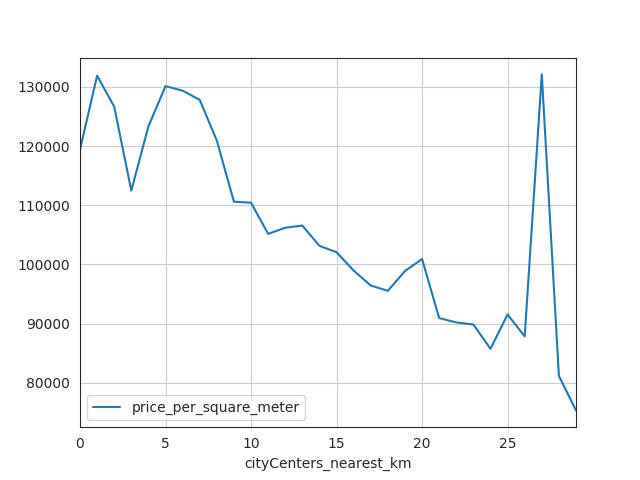

In [63]:
(df_spb
     .pivot_table(index='cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc='mean')
     .plot(grid=True)
)

Наибольшая стоимость на графике видна для расстояния до 8 км. Этот участок будем считать центральной зоной

In [64]:
spb_name_center = df_spb.query('cityCenters_nearest_km < 8')

Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

In [65]:
corr_spb = spb_name_center.corr()
corr_spb.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area_total_area,ratio_kitchen_area_total_area,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,last_price_million,cityCenters_nearest_km
total_images,1,0.144629,0.0400299,0.0173738,0.0807587,-0.0306434,0.0183649,0.00439992,0.00323973,-0.0282206,-0.0278415,0.0963492,0.0159839,0.0333979,0.012337,0.0410936,-0.0375918,-0.00903761,0.00236264,-0.0178904,-0.0360675,0.0545516,0.153126,0.0400733,0.00205763,0.124731,0.144629,0.00952808
last_price,0.144629,1,0.720848,0.434017,0.171075,0.135135,0.603029,0.187362,-0.0265212,-0.0472953,-0.0256358,0.554556,0.141294,0.103599,-0.0707515,0.0803856,0.0240569,0.0165736,-0.0481991,0.132705,-0.00490969,-0.0605147,0.551501,-0.0182403,-0.0186229,-0.0445804,1,-0.0727267
total_area,0.0400299,0.720848,1,0.757487,0.246557,-0.0111218,0.921584,0.071456,-0.0236853,-0.0661034,-0.0281718,0.530499,0.00648358,-0.0334177,-0.146119,0.0558624,-0.0297975,-0.0284496,-0.0119131,0.161877,0.199898,-0.317182,-0.118761,-0.018471,-0.0164663,-0.110948,0.720848,-0.141121
rooms,0.0173738,0.434017,0.757487,1,0.238056,-0.189677,0.825123,-0.0681548,-0.019981,-0.143879,-0.0293106,0.208303,-0.0990805,-0.0820944,-0.186201,0.0804387,-0.101691,-0.0507682,-0.0152913,0.135659,0.487519,-0.501466,-0.293432,-0.0178402,-0.00160892,-0.0938302,0.434017,-0.17861
ceiling_height,0.0807587,0.171075,0.246557,0.238056,1,-0.301491,0.265094,-0.191546,0.0275166,0.000874022,-0.000849515,0.122099,-0.128564,-0.0892776,-0.285383,0.150958,-0.126562,0.0100369,-0.0463051,0.0672931,0.127529,-0.0834107,-0.0341872,-0.031021,-0.0348617,0.0175435,0.171075,-0.278211
floors_total,-0.0306434,0.135135,-0.0111218,-0.189677,-0.301491,1,-0.120629,0.675337,0.00798018,0.00785491,0.00294955,0.0961736,0.39589,0.112128,0.371097,-0.273077,0.205666,-0.0331546,0.0246054,-0.0316878,-0.306601,0.164777,0.236244,0.0269453,-0.00049881,-0.00937385,0.135135,0.360756
living_area,0.0183649,0.603029,0.921584,0.825123,0.265094,-0.120629,1,-0.014988,-0.00712476,-0.0480951,-0.0101779,0.322384,-0.0497052,-0.0578811,-0.173869,0.0807506,-0.0775225,-0.0290571,-0.00480714,0.156309,0.528304,-0.485018,-0.202309,-0.0176464,-0.00573792,-0.105072,0.603029,-0.167687
floor,0.00439992,0.187362,0.071456,-0.0681548,-0.191546,0.675337,-0.014988,1,-0.00594772,-0.0189278,-0.00928583,0.101875,0.307309,0.0594897,0.249934,-0.190947,0.150544,-0.0437685,-0.00504758,-0.00781565,-0.17857,0.0577052,0.191872,0.0352056,0.0168316,-0.0118157,0.187362,0.240481
is_apartment,0.00323973,-0.0265212,-0.0236853,-0.019981,0.0275166,0.00798018,-0.00712476,-0.00594772,1,-0.00258251,-0.00163132,-0.00655067,0.00920659,0.0287391,0.000979593,0.0343224,-0.0312382,0.0267631,-0.00790788,-0.0366902,0.039909,0.0177457,-0.00944842,-0.0419607,-0.0429929,0.0372147,-0.0265212,-0.00124259
studio,-0.0282206,-0.0472953,-0.0661034,-0.143879,0.000874022,0.00785491,-0.0480951,-0.0189278,-0.00258251,1,-0.00258251,-0.0529949,0.0229774,-0.00127059,0.0153113,-0.0541868,-0.016027,0.00112278,0.0176181,-0.0306704,0.0582684,-0.00701227,0.0150887,0.00620592,0.0159567,0.00522463,-0.0472953,0.0134928


In [66]:
corr_last_price_spb = corr_spb['last_price']
corr_final = pd.concat([corr_last_price, corr_last_price_spb], axis=1)
corr_final

,last_price,last_price
airports_nearest,-0.026216,0.103599
balcony,0.008568,0.141294
ceiling_height,0.105360,0.171075
cityCenters_nearest,-0.206353,-0.070751
cityCenters_nearest_km,NaN,-0.072727
days_exposition,0.080858,0.132705
floor,0.026842,0.187362
floors_total,-0.006745,0.135135
is_apartment,0.026981,-0.026521
kitchen_area,0.513867,0.554556


Для квартир в центре Санкт-Петербурга связь стоимости жилья с общей и жилой площадью, площадью кухни, количеством комнат, высотой потолков, а также этажом сильнее, чем в общей таблице.

In [67]:
import pylab

In [68]:
column_list = ['total_area', 'rooms', 'floor_category', 'ceiling_height']
number=21

<IPython.core.display.Javascript object>


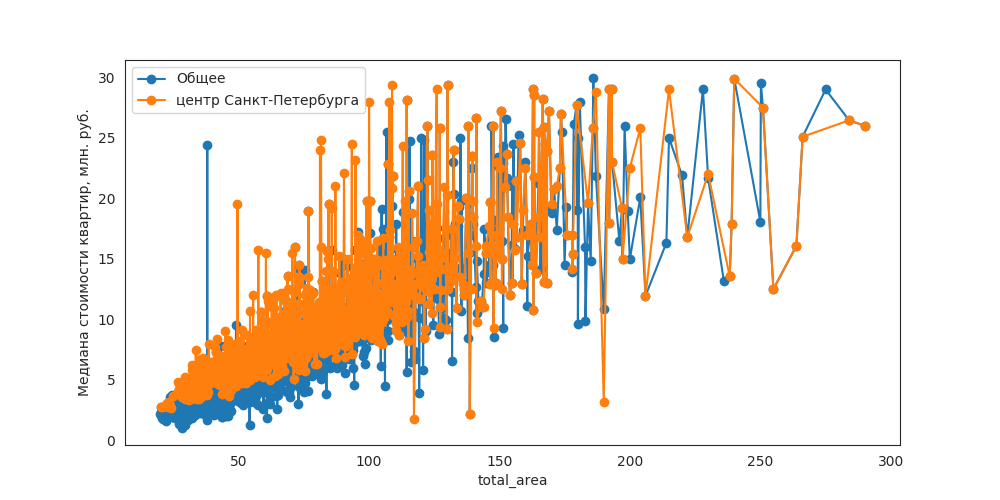

<IPython.core.display.Javascript object>


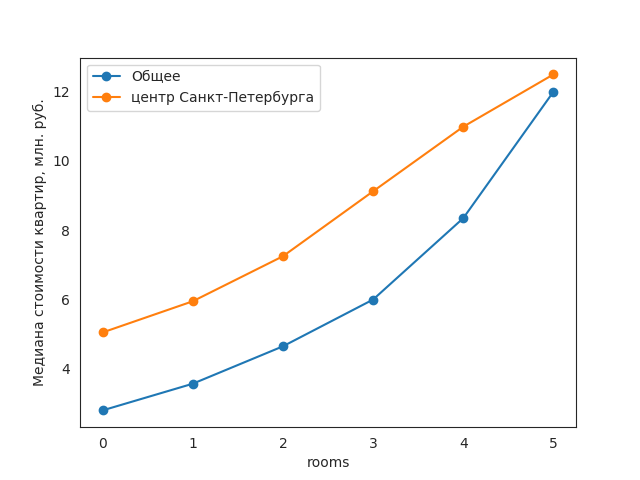

<IPython.core.display.Javascript object>


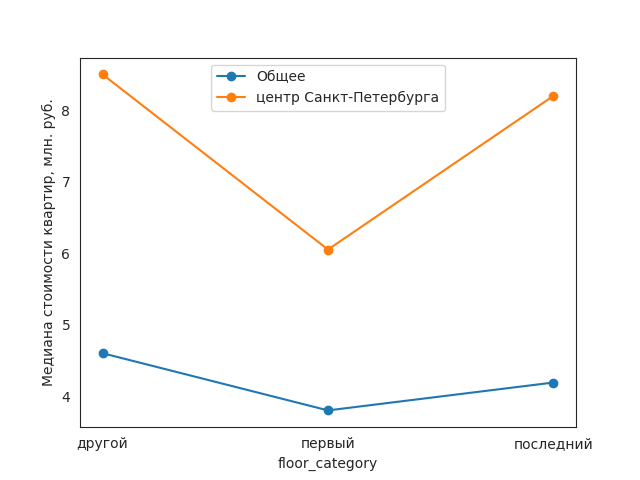

<IPython.core.display.Javascript object>


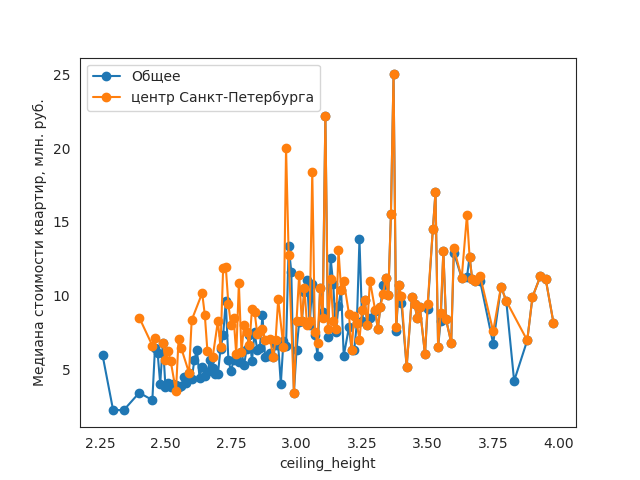

In [69]:
fig = plt.figure(figsize=(10,5))

for i in column_list:
    
    df_1 = good_df.pivot_table(index=i, values='last_price_million', aggfunc ='median')
    df_2 = spb_name_center.pivot_table(index=i, values='last_price_million', aggfunc ='median')
    
    pylab.figure(number)
    
    plt.plot(df_1.index, 'last_price_million', data=df_1, marker='o', label='Общее')
    plt.plot(df_2.index, 'last_price_million', data=df_2, marker='o', label='центр Санкт-Петербурга')
    plt.legend()
    plt.xlabel(i)
    plt.ylabel("Медиана стоимости квартир, млн. руб.")
    
    number += 1
plt.show()

В центре Санкт-Петербурга более дорогое жилье, чем в среднем по всей таблице. Здесь также чаще встречаются более высокие потолки, сильнее заметна нелюбовь к первому этажу.

### Шаг 5. Общий вывод

[к содержанию](#content)

На основании полученных данных можно сказать, что на стоимоть влияет совокупность факторов. 
В большей степени цена зависит от площади квартиры. 
Другими влияющими на цену факторами стали:
- Населенный пункт: в Санкт-Петербурге цена выше, чем в области
- Растояние от центра: квартиры в центре также выше по цене, чем на окрайне
- Этаж, на котором расположена квартира: квартиры первого и последнего этажей дешевле

Стоит обратить внимание на тот, как собираются автоматически получаемые данные, так как там довольно много пропусков.